In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install rasterio

import rasterio as rio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [3]:
import glob
images = glob.glob('/content/drive/My Drive/EuropHeight' + '/*.tif')

In [4]:
num_imgs = len(images)
print('num_imgs:',num_imgs)

num_imgs: 6430


# Remove small-size files and null bands



In [5]:
import os
statinfo = os.stat(images[25])
print(statinfo)
print(statinfo.st_size)

os.stat_result(st_mode=33152, st_ino=70, st_dev=49, st_nlink=1, st_uid=0, st_gid=0, st_size=979806, st_atime=0, st_mtime=1630799304, st_ctime=1630799304)
979806


In [6]:
numPixels = 224*224

In [7]:
import os
for filename in images:
    if filename.endswith("tif"): 
        statinfo = os.stat(filename)
        st_size = statinfo.st_size
        if st_size <= 800000:
          open(filename, 'w').close()
          os.remove(filename)
        else:
          img_multi = rio.open(filename)
          img_array = img_multi.read()
          x = img_array[4,:,:]
          x = x[~np.isnan(x)]
          if x.shape[0] != numPixels:
            open(filename, 'w').close()
            os.remove(filename)


# remove Tiff files with null values

In [ ]:
img_multi = rio.open(images[1])
img_array = img_multi.read()

In [ ]:
imtransform = img_multi.transform
print('imtransform', imtransform)

imtransform | 0.00, 0.00, 0.25|
| 0.00,-0.00, 51.56|
| 0.00, 0.00, 1.00|


In [ ]:
nRows =  img_array.shape[1]
nCols =  img_array.shape[2]
Bands = img_array.shape[0]

In [ ]:
img_array_reshape = img_array.reshape(Bands, nRows*nCols).T
img_array_reshape = img_array_reshape.reshape(nRows,nCols,Bands)
print(img_array_reshape.shape)

(224, 224, 6)


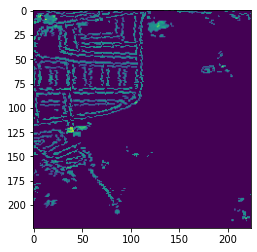

In [ ]:
plt.imshow(img_array[5,:,:].astype('float32'))
plt.show()

In [ ]:
print(img_array_reshape.reshape(1,nRows,nCols,Bands).shape)

(1, 224, 224, 6)


In [ ]:
import os

for idx, filename in enumerate(images):
  #  print(idx)
    if filename.endswith("tif"): 
        img_multi = rio.open(filename)
        img_array = img_multi.read()
        x = img_array[5,:,:]
        x = x[~np.isnan(x)]
        if x.shape[0] != numPixels:
          open(filename, 'w').close()
          os.remove(filename)
